# **1. Import Library**

In [35]:
#Import libraries yang akan digunakan
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import fetch_california_housing


# **2. Read Dataset**

In [42]:
housing = fetch_california_housing()
# Memisahkan dataset menjadi fitur (X) sebagai data input dan target (y) sebagai label output untuk model machine learning
X = housing.data
y = housing.target

# Mengonversi menjadi DataFrame
df_X = pd.DataFrame(X, columns=housing.feature_names)
df_y = pd.Series(y, name='target')

# Menggabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Menampilkan data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<Axes: title={'center': 'HouseAge'}>]], dtype=object)

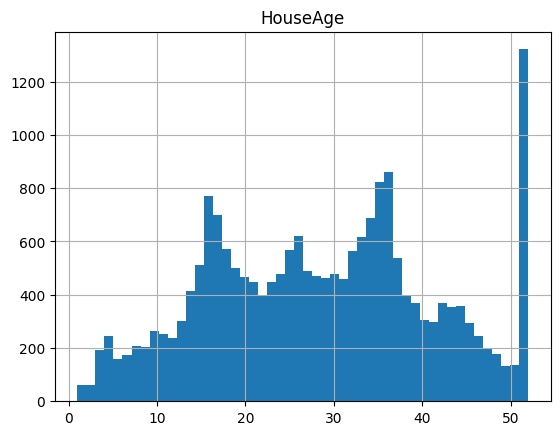

In [49]:
df.hist(column='HouseAge', bins=50)

In [50]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [51]:
X =  df[['HouseAge','Population']].values #kolom kolom yang dipakai
X[0:5]

array([[  41.,  322.],
       [  21., 2401.],
       [  52.,  496.],
       [  52.,  558.],
       [  52.,  565.]])

In [52]:
Y = df['target'].values #kolom tujuan
Y[0:5]

array([4., 3., 3., 3., 3.])

In [53]:
#Standarisasi
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.98214266, -0.9744286 ],
       [-0.60701891,  0.86143887],
       [ 1.85618152, -0.82077735],
       [ 1.85618152, -0.76602806],
       [ 1.85618152, -0.75984669]])

# **3. Split Data**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)
print('Data Training sebanyak : ',X_train.shape, Y_train.shape)
print('Data Testing sebanyak : ',X_test.shape, Y_test.shape)

Data Training sebanyak :  (16512, 2) (16512,)
Data Testing sebanyak :  (4128, 2) (4128,)


# **4. Train the Model**

In [56]:
k = 12
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=12)

# **5. Testing**

In [61]:
yhat =neigh.predict(X_test)
yhat[0:50]

array([0., 0., 1., 1., 1., 0., 1., 4., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 2., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.])

# **6. Check Accuracy**

In [62]:
print("Akurasi set Train: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Akurasi set Test: ", metrics.accuracy_score(Y_test, yhat))

Akurasi set Train:  0.4453125
Akurasi set Test:  0.34205426356589147


# **7. Predict & Evaluate**

In [63]:
Ks = 20
mean_acc = np.zeros((Ks -1))
std_acc = np.zeros((Ks-1))
confusionMx = [];
for n in range (1,Ks):

  #Train Model kita baru lakukan prediksi!
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
  yhat = neigh.predict(X_test)

  mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
  std_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.26744186, 0.29820736, 0.30184109, 0.30402132, 0.30959302,
       0.31419574, 0.32025194, 0.33018411, 0.32097868, 0.3306686 ,
       0.33866279, 0.34205426, 0.34399225, 0.3442345 , 0.34084302,
       0.33914729, 0.33842054, 0.34278101, 0.34714147])

Plot-kan K yang paling bagus

<ipython-input-64-85aef707cf92>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Akurasi','+/- 3xstd')


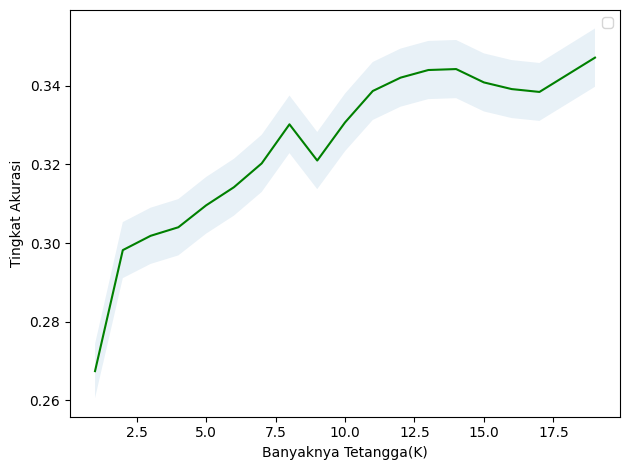

In [64]:
plt.plot(range(1,Ks), mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend('Akurasi','+/- 3xstd')
plt.ylabel('Tingkat Akurasi')
plt.xlabel('Banyaknya Tetangga(K)')
plt.tight_layout()
plt.show()

<ipython-input-65-e1a9031e9950>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Akurasi','+/- 3xstd')


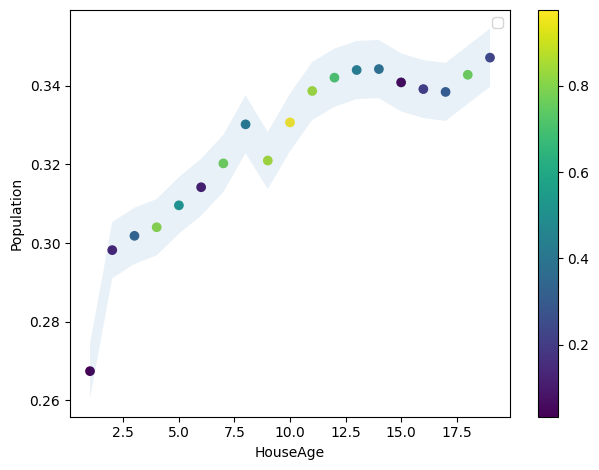

In [65]:
colors = np.random.rand(Ks-1)

plt.scatter(range(1,Ks), mean_acc, c = colors, cmap='viridis')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend('Akurasi','+/- 3xstd')
plt.ylabel('Tingkat Akurasi')
plt.xlabel('Banyaknya Tetangga(K)')
plt.colorbar()
plt.xlabel('HouseAge')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

<ipython-input-71-48ffd2a45e10>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Akurasi','+/- 3xstd')


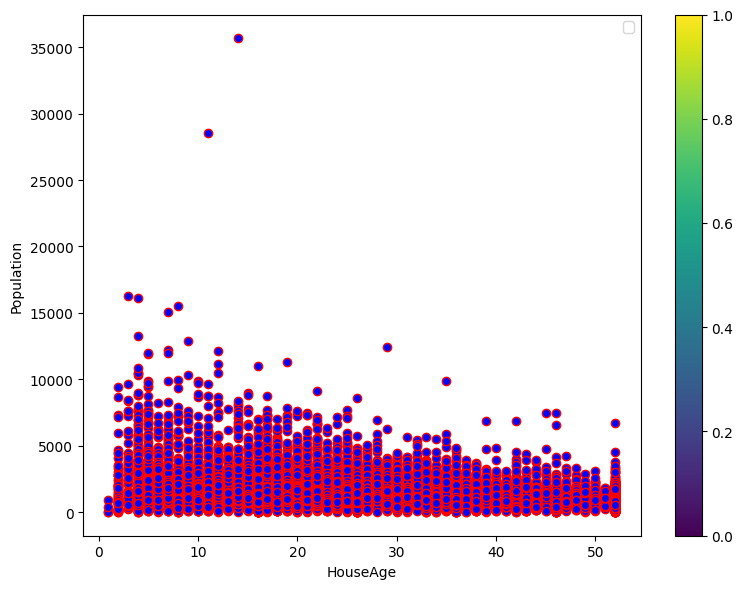

In [71]:
plt.figure (figsize=(8,6))
plt.scatter(df['HouseAge'],df['Population'], c = 'blue', marker = 'o', edgecolors = 'red')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend('Akurasi','+/- 3xstd')
plt.ylabel('Tingkat Akurasi')
plt.xlabel('Banyaknya Tetangga(K)')
plt.colorbar()
plt.xlabel('HouseAge')
plt.ylabel('Population')
plt.tight_layout()
plt.show()